# 0.0 - K-Means

O parâmetro utilizado para treinar o algoritmo **K-Means** será o número de clusters (*int*), `n_clusters`. Para mais detalhes do algoritmo, sugerimos a consulta da documentação oficial na página:</br></br>https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html

# 1.0 - Importando bibliotecas 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy  as np
from scipy import stats

from sklearn import cluster as c
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics as m

# 2.0 - Funções

In [2]:
def plot_silhouette_elbow(kmeans, n_clusters_range, silhouette_scores, inertias):
    """
      Plota lado a lado o Silhouette Score e o Elbow Method para diferentes números de clusters.

      Esta função recebe os resultados pré-calculados do KMeans para diferentes valores de k 
      e plota os gráficos do Silhouette Score e do Elbow Method, facilitando a visualização 
      e comparação para a escolha do número ideal de clusters.

      Args:
          kmeans (sklearn.cluster.KMeans): Modelo KMeans já treinado.
          n_clusters_range (numpy.ndarray): Array NumPy de números de clusters utilizados.
          silhouette_scores (numpy.ndarray): Array NumPy contendo os valores médios do Silhouette Score para cada k.
          inertias (numpy.ndarray): Array NumPy contendo os valores de Inércia (WCSS) para cada k.
      """
    plt.figure(figsize = (10, 4.5))
    # Plot Silhouette Score
    plt.subplot(1, 2, 1)
    plt.plot(n_clusters_range, silhouette_scores, marker='o')
    plt.xlabel('Número de clusters K')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')

    # Plot Elbow Method
    plt.subplot(1, 2, 2)
    plt.plot(n_clusters_range, inertias, marker='o')
    plt.xlabel('Número de clusters K')
    plt.ylabel('Inércia (Inertia)')
    plt.title('Método do Cotovelo')
    
    # Inserir espaço horizontal entre os subplots 
    plt.subplots_adjust(wspace=0.5)  

    plt.tight_layout()
    plt.show()
    
def visualiza_clusters(X_data, k):
    """
      Visualiza os clusters obtidos através do algoritmo KMeans.

      Esta função recebe um array NumPy contendo os dados e o número de clusters desejado (k) e 
      plota um scatter plot com os pontos coloridos de acordo com o cluster a que pertencem. 
      Também plota os centróides dos clusters com marcadores 'x' vermelhos.

      Args:
          X_data (numpy.ndarray): Array NumPy contendo os dados a serem clusterizados.
          k (int): Número de clusters desejado para o KMeans.
      """
    kmeans = c.KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_data)

    plt.scatter(X_data[:, 0], X_data[:, 1], c=labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')
    plt.xlabel('alcohol')
    plt.ylabel('malic acid')
    plt.title(f'Clusters para K={k}')
    plt.show();

# 3.0 - Carregando os dados

In [3]:
df = pd.read_csv('data/X_dataset.csv')
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


# 4.0 - Desempenho do modelo

In [4]:
# Como temos apenas dados numéricos, a seleção é mais simples. 
# X: Array NumPy contendo todas as features numéricas extraídas diretamente do DataFrame Pandas.
X = df.values

In [5]:
# Array que gera valores representando os clusters de 2 até 10
n_clusters = np.arange(2, 11, 1)  

# Criar DataFrame para armazenar resultados
metrics_df = pd.DataFrame(columns=["número de clusters", "silhouette score média (avg SS)", "Inércia (Inertia)"])
for k in n_clusters:
    kmeans = c.KMeans( n_clusters = k, random_state = 0 )
    kmeans.fit( X )
    
    # performance (test)
    ss_avg = np.round( m.silhouette_score( X, kmeans.labels_ ), 5 )
    inercia = np.round( kmeans.inertia_, 3 )
    
    new_row = pd.DataFrame({"número de clusters": [k], 
                            "silhouette score média (avg SS)": [ss_avg],
                            "Inércia (Inertia)": [inercia]})

    # Concatenar a nova linha ao DataFrame existente
    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
metrics_df

,número de clusters,silhouette score média (avg SS),Inércia (Inertia)
0,2,0.21322,1017.833
1,3,0.23157,829.161
2,4,0.20640,754.796
3,5,0.20752,694.845
4,6,0.18985,638.377
5,7,0.19083,601.211
6,8,0.16320,570.417
7,9,0.17606,514.531
8,10,0.17611,492.048


## 4.1 - Melhor K segundo a métrica de *Silhouette Score* e o *Elbow Method*

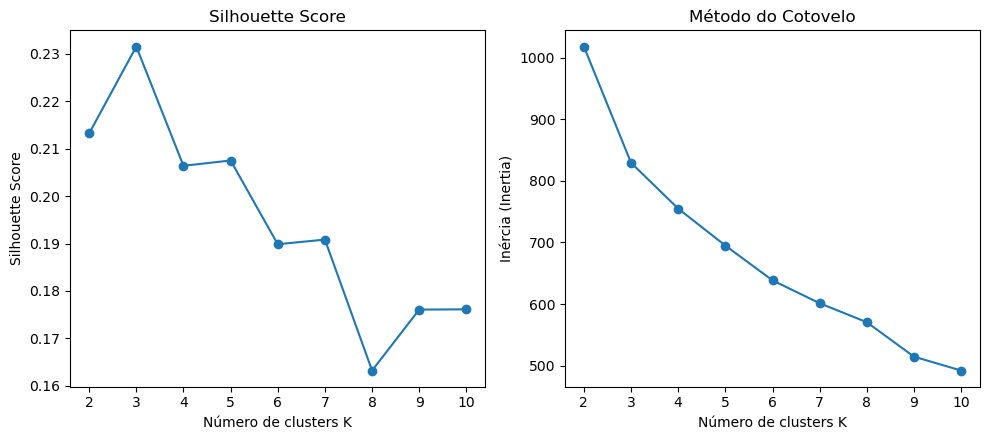

In [6]:
plot_silhouette_elbow(kmeans, 
                      n_clusters, 
                      metrics_df['silhouette score média (avg SS)'].values, 
                      metrics_df['Inércia (Inertia)'].values)

Vamos encontrar o valor de `k` (`número de clusters`) que fornece o melhor desempenho.</br> Pelo gráfico acima (esquerda), mostrando a `Silhouette Score Média (avg SS)` pelo `número de clusters`, fica claro que a melhor escolha de `k` é `3`.</br> Com efeito, podemos ordenar `metrics_df` considerando a `silhouette score média (avg SS)` da maior para a menor.

In [7]:
metrics_df.sort_values(by='silhouette score média (avg SS)', ascending=False).head(1)

,número de clusters,silhouette score média (avg SS),Inércia (Inertia)
1,3,0.23157,829.161


A escolha também pode ser corroborada através do *Elbow Method*, ou **Método do Cotovelo**.
**Insight Principal**: No gráfico do cotovelo (direita), observe que conforme o número de clusters aumenta, a inércia diminui rapidamente no início, mas a taxa de redução desacelera a partir de um certo ponto (`k=3`). Esse ponto é o **"cotovelo"** (ou *elbow*) e indica o valor ideal de `k` para o conjunto de dados. 

## 4.2 - Visualização dos clusters formados - gráfico de dispersão

Devido à alta dimensionalidade do conjunto de dados (várias *features*), optamos por utilizar o seguinte gráfico de dispersão para uma visualização clara dos clusters formados. O recorte 2-D é uma projeção dos dados no plano das variáveis `alcohol` e `malic_acid`.</br>Contudo, seria adequado usar técnicas mais avançadas de visualização, como projeções tridimensionais (para três features) ou técnicas de redução de dimensionalidade, como o PCA (*Principal Component Analysis*). Entretanto, dado o caráter introdutório do curso, essas técnicas ficaram de fora do escopo, sendo apenas mencionadas. 

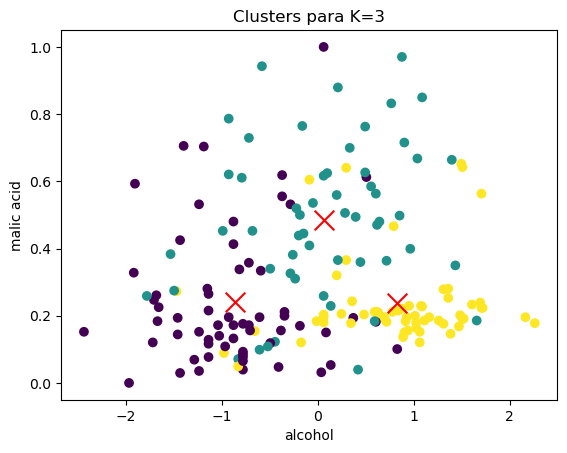

In [8]:
# Visualização dos clusters com o melhor K
visualiza_clusters(X, 3)

Um valor de **0.23157** para a **Silhouette Score Média** indica que os clusters identificados pelo algoritmo *K-Means* não estão muito bem definidos. Como visto acima, há sobreposição considerável entre os clusters, o que pode significar que os dados não têm uma separação natural clara, ou que as características (*features*) utilizadas não são suficientes para separar bem os grupos.</br>Sabe-se que a **Silhouette Score** varia de **-1** a **1**, onde valores próximos de **1** indicam clusters bem definidos e separados, enquanto valores próximos de **0** ou **negativos** indicam que os pontos estão mal agrupados ou atribuídos a clusters errados.</br> Esse valor baixo pode sugerir que os grupos formados não capturam bem as estruturas subjacentes dos dados.

# 5.0 - Refinamento do pré-processamento

Com o intuito de melhorar o desempenho da **Silhouette Score** no ensaio, iremos adotar duas abordagens básicas, dentro do nível introdutório do curso:

- **Análise de Correlação entre as *features***: permite identificar variáveis que podem ser redundantes ou irrelevantes para o algoritmo de *clustering*. Em particular, utilizaremos um mapa de calor (*heatmap*) de correlações para visualizar isso.</br></br>

- **Remoção de *Outliers***: *outliers* podem distorcer o clustering, especialmente no *K-Means*, que é sensível a pontos distantes do centro dos clusters. Aplicaremos o *Z-score* para detectá-los e eliminá-los.

## 5.1 - Matriz de Correlações

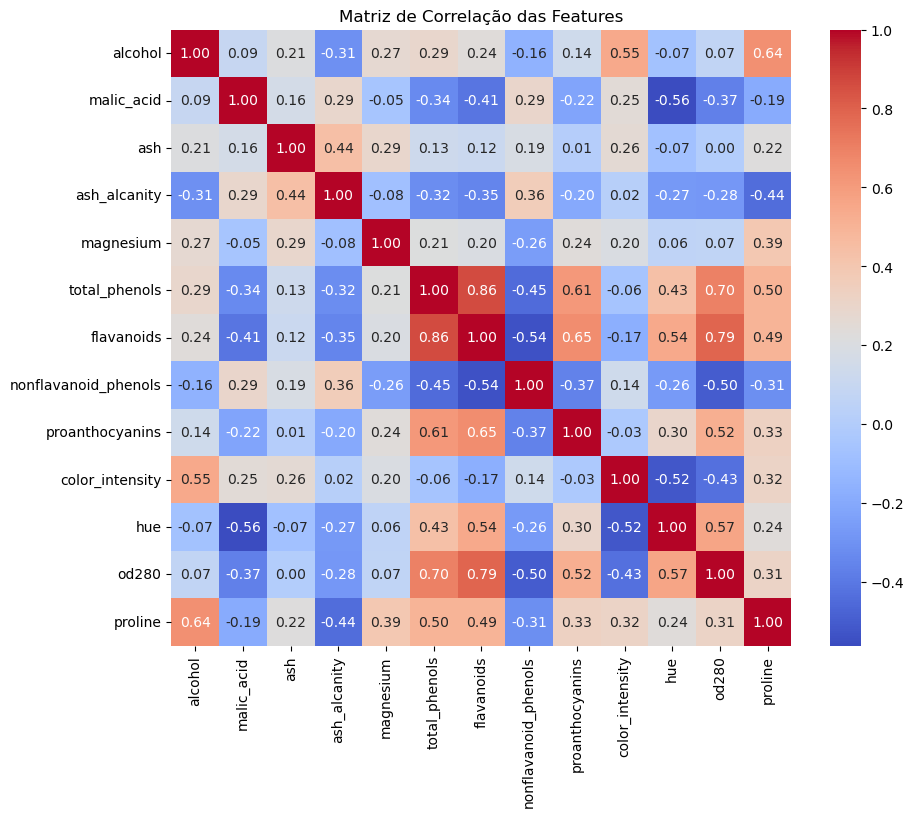

In [9]:
# Criando o heatmap das correlações
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Features')
plt.show();

Em análises de correlação, geralmente, um limiar comum usado para identificar alta correlação entre variáveis é de **0.8** ou **0.85**. Isso significa que, se a correlação entre duas variáveis for superior a esse valor, uma das variáveis pode ser considerada redundante, pois as duas estão transmitindo informações muito semelhantes.</br> No presente ensaio, adotaremos o limiar de **0.8**. Assim, colunas que possuem correlações acima ou próximas desse valor serão excluídas.</br> Observando o **mapa de correlações**, notamos que as *features* **total_phenols** e **flavaniods** têm uma alta correlação de **0.86**, como também **flavanoids** e **od280** com **0.79**.</br>Nesse caso, vamos eliminar as coluna de **total_phenols** e **od280**.

In [10]:
df1 = df.drop(columns=['total_phenols', 'od280'])

## 5.2 - Remoção de *outliers*

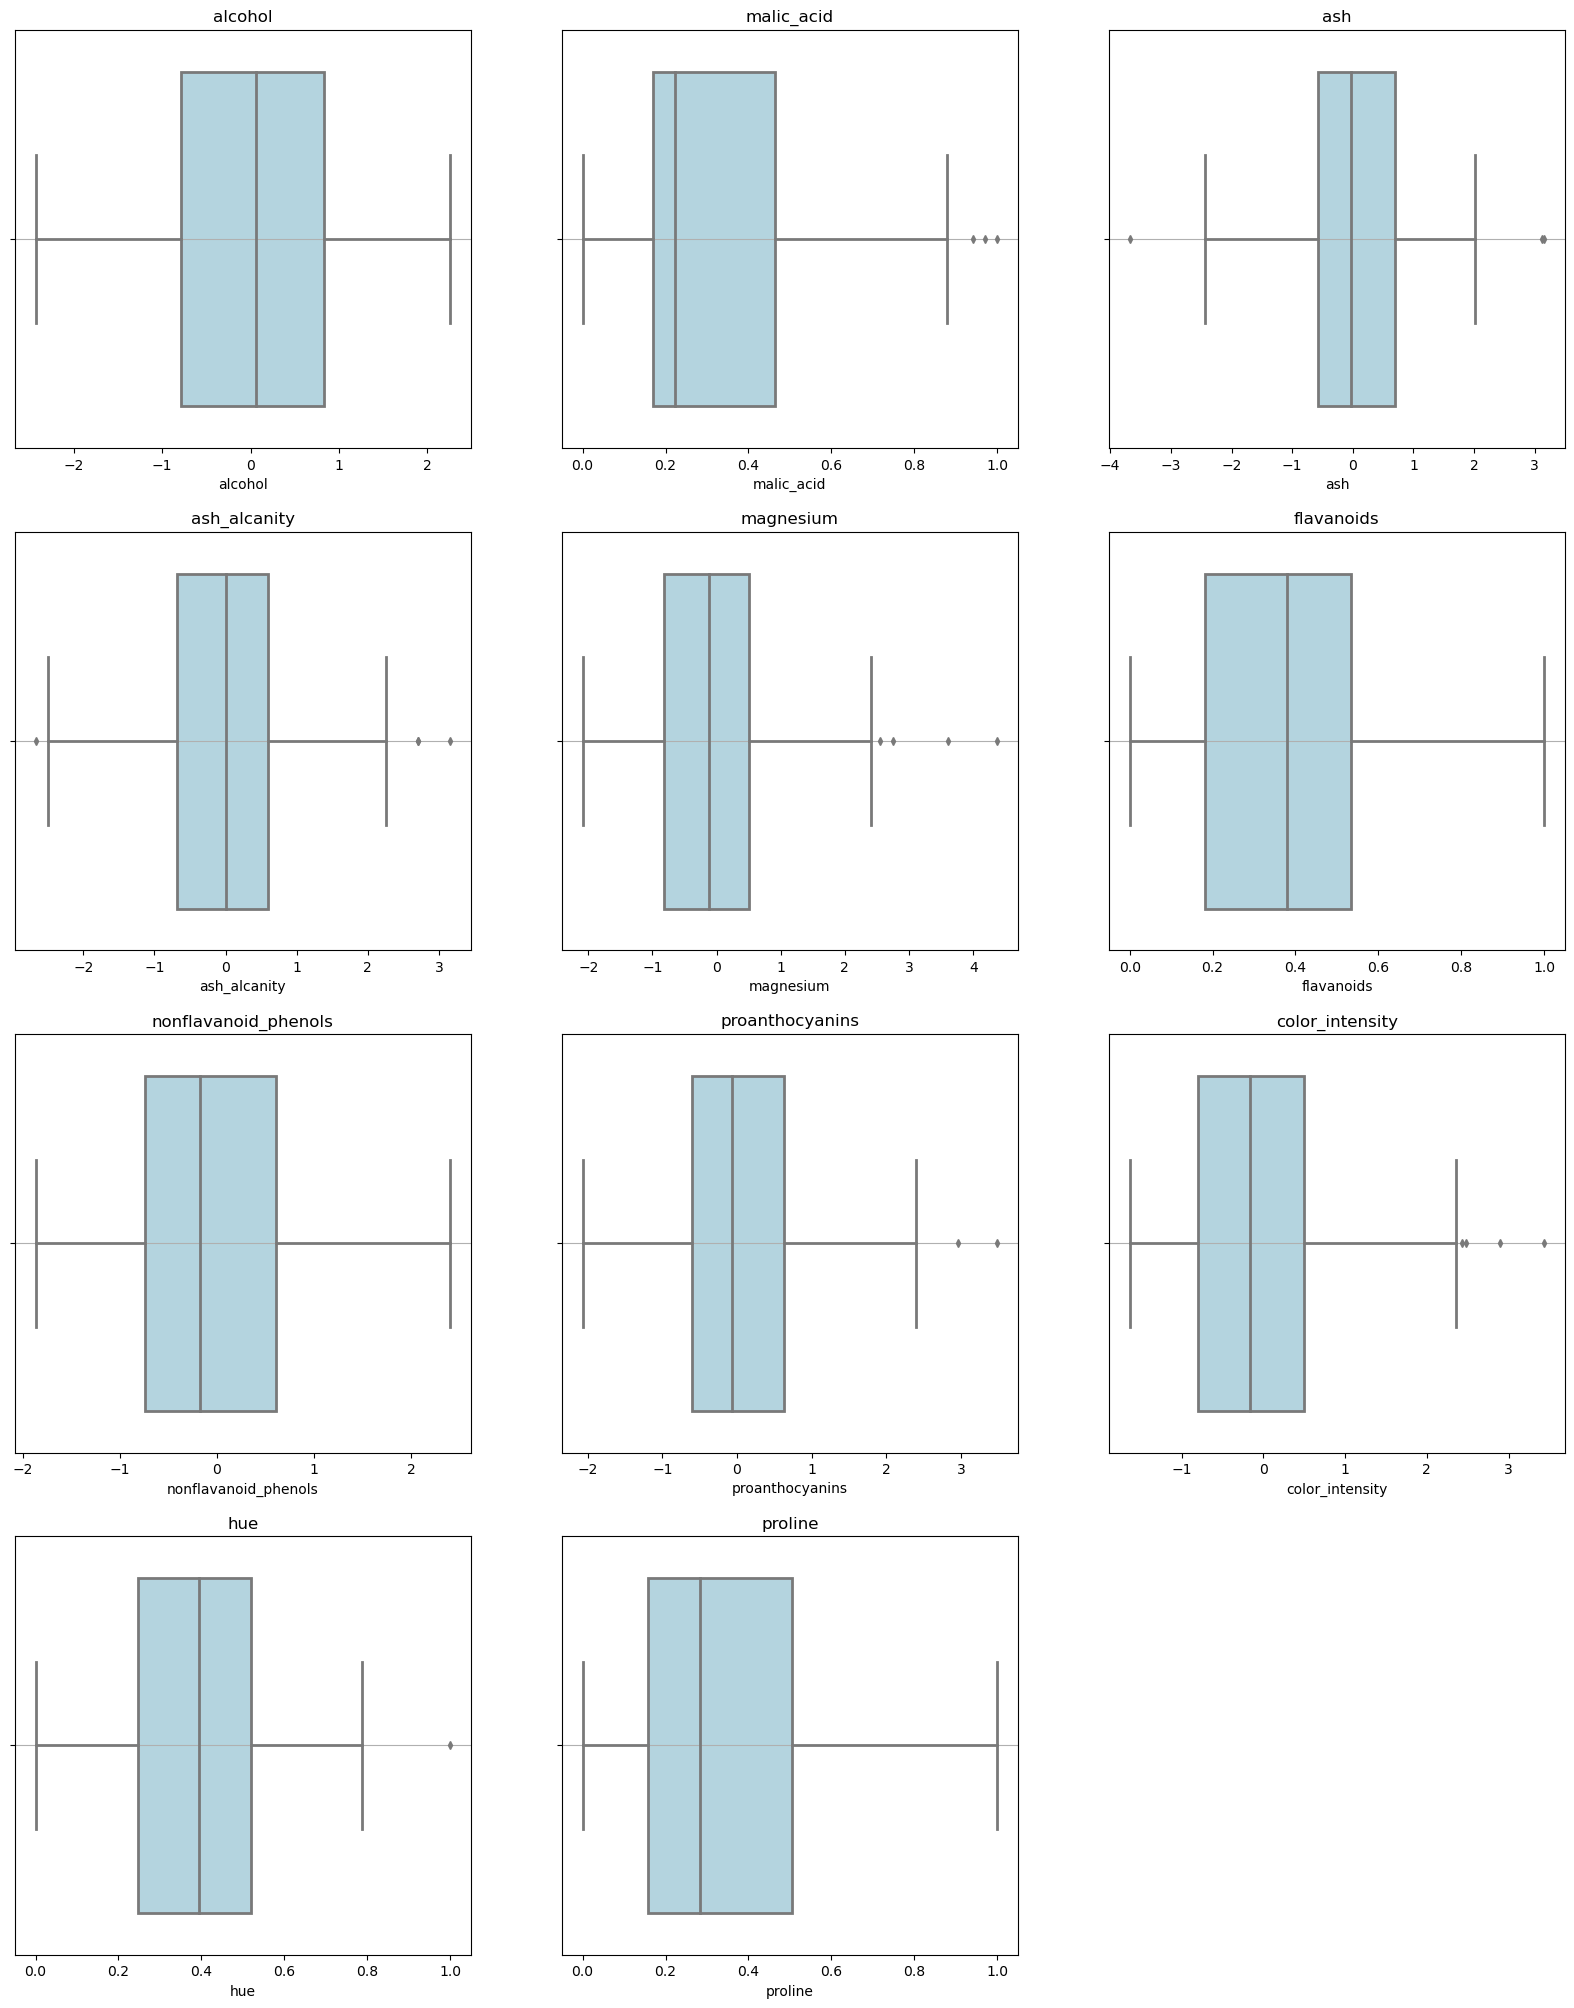

In [11]:
# Boxplot - Visualização
plt.figure(figsize = (20,25))
sns.set_palette("husl")  

for i, col in enumerate(df1.columns):
    plt.subplot(4,3,i+1)
    g = sns.boxplot(x = df1[col], color='lightblue', linewidth=2, fliersize=4)
    g.set_title(col)
    plt.grid(axis='y')
plt.show();

In [12]:
# Definindo um limiar de 3 desvios-padrão
z_scores = np.abs(stats.zscore(df1))
df1_cleaned = df1[(z_scores < 3).all(axis=1)]

In [13]:
# Identificando os dados removidos
outliers = df1[~(df1.index.isin(df1_cleaned.index))]

# Contando quantos dados foram removidos
num_outliers = len(outliers)
print(f"Quantidade de outliers presentes: {num_outliers}")

Quantidade de outliers presentes: 10


Como visto nos gráficos de *box plot*, há pouquíssimos *outliers* nos dados.

# 6.0 - Desempenho do modelo refinado

In [14]:
df1_cleaned = df1_cleaned.reset_index(drop=True)
X_ = df1_cleaned.values

# Array que gera valores representando os clusters de 2 até 10
n_clusters = np.arange(2, 11, 1)  

# Criar DataFrame para armazenar resultados
metrics_df_ = pd.DataFrame(columns=["número de clusters", "silhouette score média (avg SS)", "Inércia (Inertia)"])
for k in n_clusters:
    kmeans = c.KMeans( n_clusters = k, random_state = 0 )
    kmeans.fit( X_ )
    
    # performance (test)
    ss_avg_ = np.round( m.silhouette_score( X_, kmeans.labels_ ), 5 )
    inercia_ = np.round( kmeans.inertia_, 3 )
    
    new_row_ = pd.DataFrame({"número de clusters": [k], 
                             "silhouette score média (avg SS)": [ss_avg_],
                             "Inércia (Inertia)": [inercia_]})

    # Concatenar a nova linha ao DataFrame existente
    metrics_df_ = pd.concat([metrics_df_, new_row_], ignore_index=True)
metrics_df_

,número de clusters,silhouette score média (avg SS),Inércia (Inertia)
0,2,0.22686,807.386
1,3,0.24452,646.751
2,4,0.22010,583.373
3,5,0.19319,530.080
4,6,0.19804,476.404
5,7,0.19030,463.129
6,8,0.15296,453.168
7,9,0.16271,422.598
8,10,0.16143,404.520


## 6.1 - Melhor K segundo a métrica de *Silhouette Score* e o *Elbow Method*

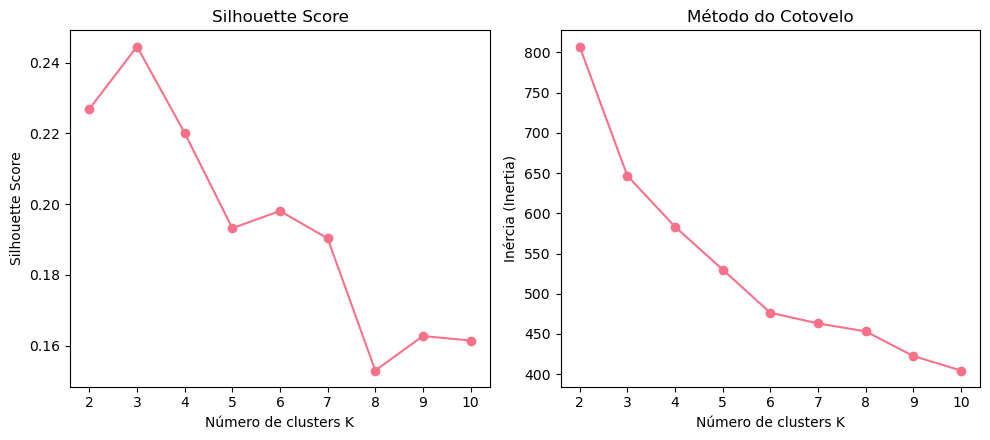

In [15]:
plot_silhouette_elbow(kmeans, 
                      n_clusters, 
                      metrics_df_['silhouette score média (avg SS)'].values, 
                      metrics_df_['Inércia (Inertia)'].values)

In [16]:
metrics_df_.sort_values(by='silhouette score média (avg SS)', ascending=False).head(1)

,número de clusters,silhouette score média (avg SS),Inércia (Inertia)
1,3,0.24452,646.751


Pelo gráfico (esquerda), mostrando a `Silhouette Score Média (avg SS)` pelo `número de clusters`, novamente está claro que a melhor escolha para `k` é `3`.</br>O mesmo acontece ao analisar o segundo gráfico (direita) ilustrando o **Método do Cotovelo**.
</br>No entanto, é importante chamar a atenção para os ganhos marginais da `Silhouette Score Média (avg SS)` (de **0.23157** para **0.24452**) após as novas etapas de refinamento dos dados.  

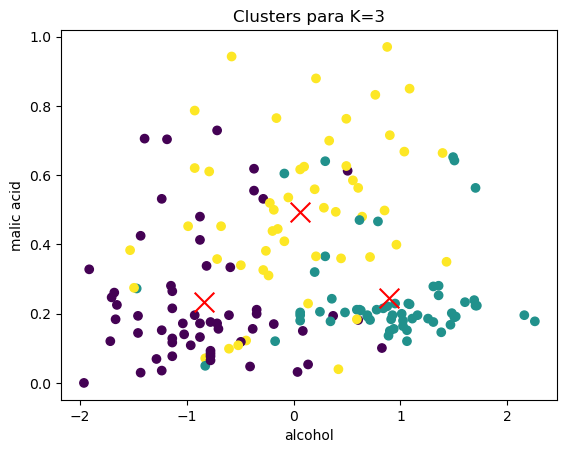

In [17]:
# Visualização dos clusters com o melhor K
visualiza_clusters(X_, 3)

# 7.0 - Conclusão

Apesar de determinarmos com sucesso a quantidade de *clusters* (o problema original analisou 3 tipos de vinhos de fato), as técnicas mais básicas até aqui empregadas não foram tão efetivas no sentido de remover a sobreposição entre os diferentes tipos de *clusters*, como visto no gráfico acima.</br> Possibilidades de melhora portanto incluem:

- Reavaliar a importância de cada uma das *features* para a construção do modelo;
- Criação de novas variáveis a partir das existentes (*feature engineering*);
- Explorar diferentes tipos de algoritmos de clusterização ainda não vistos, como *K-Medoids*, *Hierarchical Clustering*, *DBSCAN*, etc;
- Utilizar outras métricas, como o *Calinski-Harabasz Index* e o	*Davies-Bouldin Index*.